In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import scale,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Dataset can be found at https://www.kaggle.com/datasets/sameersmahajan/seattle-house-sales-prices 

#read Seattle House Price data from house_sales
df = pd.read_csv('house_sales.csv')
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [3]:
#The dataset inclues information about 21612 different homes so we can split the dataset into halves accordingly 

# Our first model will use 3 linear regression models to see which one factor out of the 3 has the biggest effect on house price 

x1 = df['sqft_living'].values[:,np.newaxis]

y = df['price']


x_train = x1[0:10806]
x_test = x1[10806:]

y_train = y[0:10806]
y_test = y[10806:]


In [4]:
linmod = LinearRegression()

linmod.fit(x1,y)

print(linmod.intercept_)
print(linmod.coef_)

-43580.74032708502
[280.62356663]


In [6]:
pred1 = linmod.predict(x1)

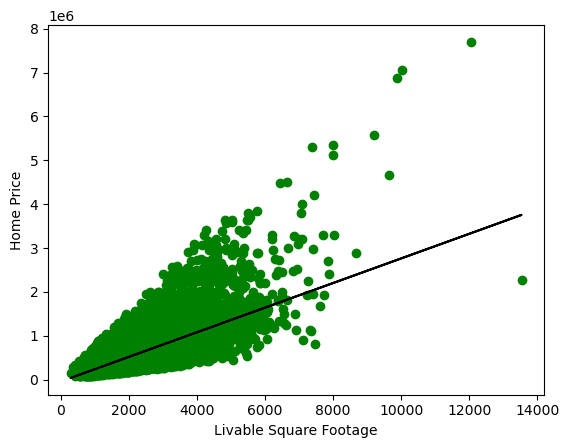

R-square: 0.492853214845565
68351287053.698746


In [7]:
plt.scatter(x1, y,color='g')
plt.plot(x1, pred1,color='k')
plt.xlabel('Livable Square Footage')
plt.ylabel('Home Price')
plt.show()

rs = r2_score(y, pred1)
print("R-square:", rs)

mse = mean_squared_error(y, pred1)
print(mse)

In [10]:
x2 = df['bedrooms'].values[:,np.newaxis]

y = df['price']


x_train = x2[0:10806]
x_test = x2[10806:]

y_train = y[0:10806]
y_test = y[10806:]

In [11]:
linmod = LinearRegression()

linmod.fit(x2,y)

print(linmod.intercept_)
print(linmod.coef_)

129802.35737890413
[121716.12623836]


In [124]:
pred2 = linmod.predict(x2)

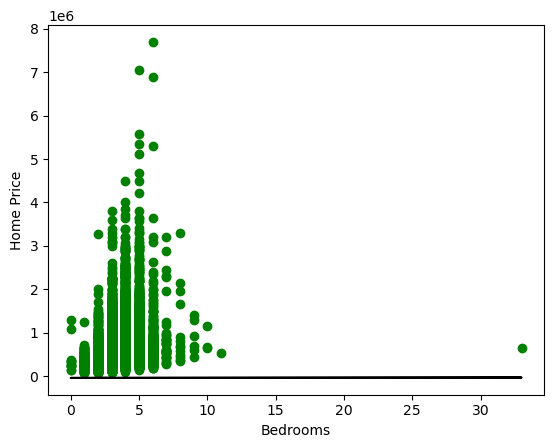

R-square: -2.519043836522263
474283151280.22864


In [125]:
plt.scatter(x2, y,color='g')
plt.plot(x2, pred2,color='k')
plt.xlabel('Bedrooms')
plt.ylabel('Home Price')
plt.show()

rs = r2_score(y, pred2)
print("R-square:", rs)

mse = mean_squared_error(y, pred2)
print(mse)

In [45]:
x3 = df['floors'].values[:,np.newaxis]

y = df['price']


x_train = x3[0:10806]
x_test = x3[10806:]

y_train = y[0:10806]
y_test = y[10806:]

In [46]:
linmod = LinearRegression()

linmod.fit(x3,y)

print(linmod.intercept_)
print(linmod.coef_)

279198.51524168934
[174588.80996645]


In [126]:
pred3 = linmod.predict(x3)

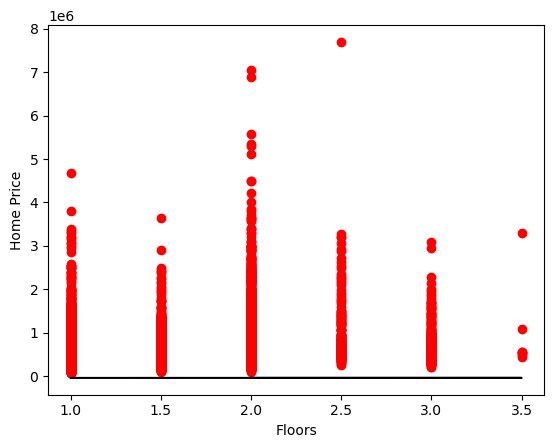

R-squared: -2.5238256424883283
474927624639.4004


In [127]:
plt.scatter(x3, y,color='r')
plt.plot(x3, pred3,color='k')
plt.xlabel('Floors')
plt.ylabel('Home Price')
plt.show()

rs = r2_score(y, pred3)
print("R-squared:", rs)

mse = mean_squared_error(y, pred3)
print(mse)

 To evauluate this different linear regression models I used their r squared scores and mse to evaluate the models 

 Out of the 3 the sq_ft living model had the higest correaltion with a r squared score of 0.49 

 The other 2 models using bedrooms and floors had a r squared score of < 0.1 
 
 One thing all 3 models had in common was a really high mse value 

  From these models we can conclude that no single variable effects price heavily instead a combniation of different metrics will help better predict home prices

 In the next part I will use multivarite to better predict home prices 

In [74]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [83]:
#Using features that easily interpertable  to predict price 


X = df.drop(['date','price','id','view','condition','grade'],axis=1)
y= df['price']

X_train = X[0:10806]
X_test = X[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

train_preds = linmod3.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)
print('training MSE: %s\n\n' % train_mse)

coefs = linmod3.coef_

print("Here are the coefficients of the model: ")
for i in range(len(coefs)):
    print(X.columns[i], coefs[i])

training MSE: 46788705839.55485


Here are the coefficients of the model: 
bedrooms -56404.29004586434
bathrooms 55273.30262327527
sqft_living 158.94723639929362
sqft_lot 0.2400419910918572
floors 4797.62236185525
waterfront 841913.3212550825
sqft_above 105.30620483898747
sqft_basement 53.641031444862165
yr_built -2736.7756381341146
yr_renovated 24.398805524709985
zipcode -575.999067134884
lat 612801.4570102495
long -266948.13628350635
sqft_living15 84.36572520072878
sqft_lot15 -0.6965726278867805


mean squared error: 129935481330.4973




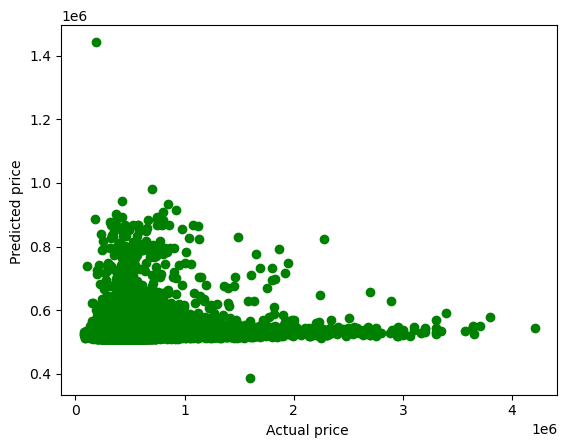

R-sqaured: 0.005734877498507873


In [106]:
pred1 = linmod3.predict(X_test)

test_mse = mean_squared_error(y_test, preds)
print('mean squared error: %s\n\n' % test_mse)

plt.scatter(y_test, pred1,color='g')
plt.xlabel("Actual price ")
plt.ylabel("Predicted price ")
plt.show()

rs = r2_score(y_test, pred1)
print('R-sqaured:',rs)

Again our MSE scores are very high for both the training and testing datasets, interstingly though the test set has a lower mse score.

From our training model we can determine which features are closely related and can be used to better predicte prices such as:
sqft_lot, sqft_basement,yr_renovated,sqft_living15 and sqft_lot15 in this case

Certain features that were effecting the models in a negative way and should not be included in our other multivariate models include : bedrooms,bathrooms,floors,yr_built,lat and long

Features that can be used along with a good mix of our great features include: sqft_living,sqft_above.

From this first model any feature that mesarues sqft in some capacity will be great.

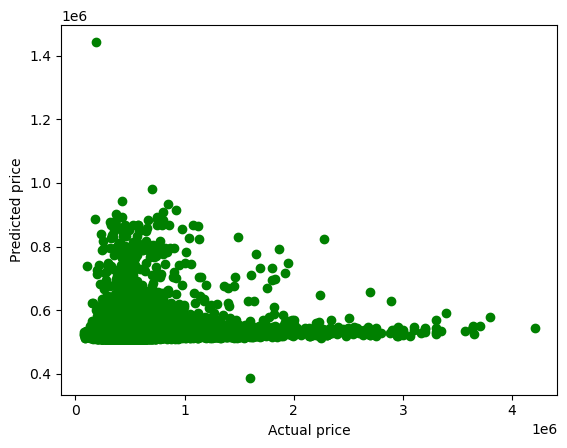

mean squared error: 129935481330.4973
R-sqaured: 0.005734877498507873


In [105]:
#Using the the 2 features with the highest correaltion 
X = df[['sqft_lot', 'sqft_lot15']]

# add interaction terms
poly = PolynomialFeatures(2, interaction_only=True)

polyX = poly.fit_transform(X)

X_train = polyX[0:10806]
X_test = polyX[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

pred2 = linmod3.predict(X_test)

plt.scatter(y_test, pred2,color='g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

mse = mean_squared_error(y_test, pred2)
print('mean squared error:', mse)

rs = r2_score(y_test, pred2)
print('R-sqaured:',rs)

From this model we can observe that using a model with the 2 best correatlion scores is not going to lead to a accurate model.

In this case if your trying to predict a house price with just the square footage of the lot 

The MSE score increased compared to the first model that included most of the datasets features.

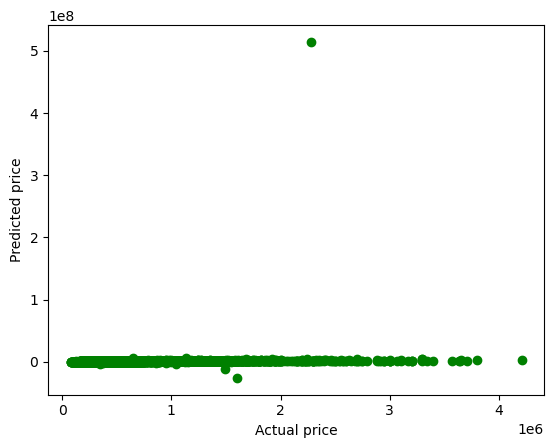

mean squared error: 24410114482730.38
R-sqaured: -185.78597422296923


In [109]:
#Using all features that measure any kind of sqft 
X = df[['sqft_lot', 'sqft_living','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]

# add interaction terms
poly = PolynomialFeatures(6, interaction_only=True)

polyX = poly.fit_transform(X)

X_train = polyX[0:10806]
X_test = polyX[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

pred3 = linmod3.predict(X_test)

plt.scatter(y_test, pred3,color='g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

mse = mean_squared_error(y_test, pred3)
print('mean squared error:', mse)

rs = r2_score(y_test, pred3)
print('R-sqaured:',rs)

This model had worse mse and r sqaured score meaning it is worse than our previous model at predicting home prices

A better model we can use will have a combination of these features

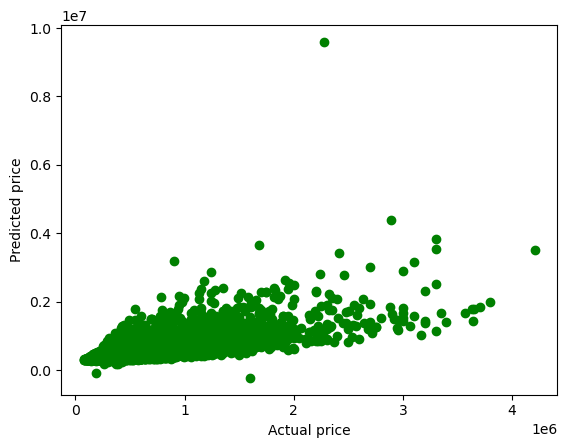

mean squared error: 65960618174.204
R-sqaured: 0.49526994907236177


In [110]:
#Removing the sqf15 features 
X = df[['sqft_lot', 'sqft_living','sqft_above','sqft_basement']]

# add interaction terms
poly = PolynomialFeatures(4, interaction_only=True)

polyX = poly.fit_transform(X)

X_train = polyX[0:10806]
X_test = polyX[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

pred4 = linmod3.predict(X_test)

plt.scatter(y_test, pred4,color='g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

mse = mean_squared_error(y_test, pred4)
print('mean squared error:', mse)

rs = r2_score(y_test, pred4)
print('R-sqaured:',rs)

When we eliminated the sqftlot15 and sqfitliving15 features our model improve greatly

Our MSE reduced a lot and our r-squared value increased a lot as well 

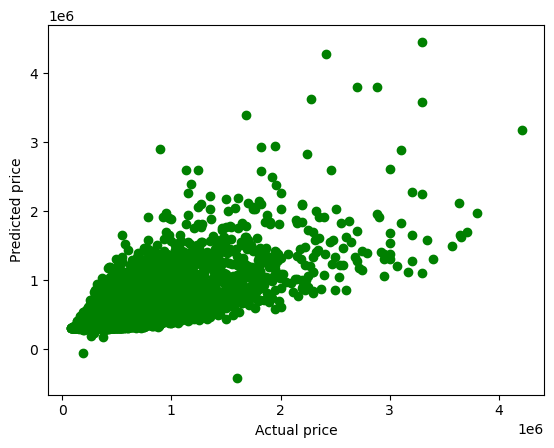

mean squared error: 62246356242.75532
R-sqaured: 0.523691447622717


In [112]:
X = df[['sqft_lot', 'sqft_living','sqft_above']]

# adding 3 interaction terms
poly = PolynomialFeatures(3, interaction_only=True)

polyX = poly.fit_transform(X)

X_train = polyX[0:10806]
X_test = polyX[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

pred5 = linmod3.predict(X_test)

plt.scatter(y_test, pred5,color='g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

mse = mean_squared_error(y_test, pred5)
print('mean squared error:', mse)

rs = r2_score(y_test, pred5)
print('R-sqaured:',rs)

In [ ]:
Removing the sqftbasement feature improve our model more

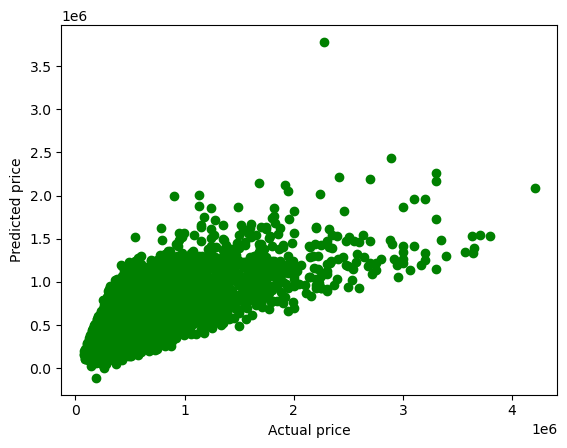

mean squared error: 65764568651.249176
R-sqaured: 0.4967701182406371


In [114]:
X = df[['sqft_lot', 'sqft_living']]

# adding 2 interaction terms
poly = PolynomialFeatures(2, interaction_only=True)

polyX = poly.fit_transform(X)

X_train = polyX[0:10806]
X_test = polyX[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

pred6 = linmod3.predict(X_test)

plt.scatter(y_test, pred6,color='g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

mse = mean_squared_error(y_test, pred6)
print('mean squared error:', mse)

rs = r2_score(y_test, pred6)
print('R-sqaured:',rs)

Reducing our multivaritate model to just 2 features reduces its ability to predict accurately to the same level of 4 features. 

From this we can deduce that 3 features are the best multivarite regression model 

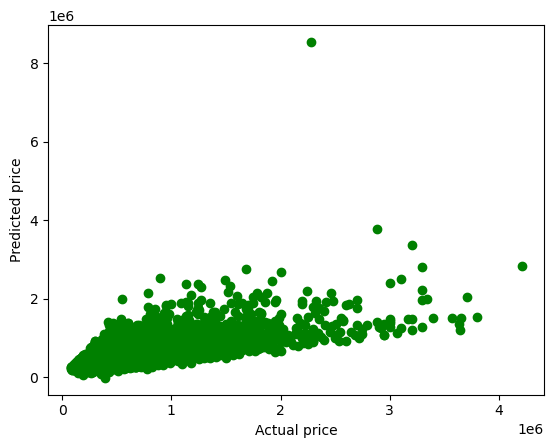

mean squared error: 67926775630.25961
R-sqaured: 0.48022493008382217


In [115]:
#Test to see if square footage of basement has more of a effect on the home price compared to the square footage of the home above the basement
X = df[['sqft_lot', 'sqft_living','sqft_basement']]

# adding 3 interaction terms
poly = PolynomialFeatures(3, interaction_only=True)

polyX = poly.fit_transform(X)

X_train = polyX[0:10806]
X_test = polyX[10806:]

y_train = y[0:10806]
y_test = y[10806:]

linmod3 = LinearRegression()

linmod3.fit(X_train, y_train)

pred7 = linmod3.predict(X_test)

plt.scatter(y_test, pred7,color='g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

mse = mean_squared_error(y_test, pred7)
print('mean squared error:', mse)

rs = r2_score(y_test, pred7)
print('R-sqaured:',rs)

From this model we can deduce that square footage that is avaialbe above the basement has a greater effect than the square footage of the basment

I will stop here for the multivarite regression as we have seen square footage has the biggest effect on home prices when including multiple features

Our models performed a lot better when looking at different kinds of square footage and the effects they have.

Livable square footage, lot square footage and square footage avaialbe above the basement are the best combination of features to predcit a home price

Another thing to note is that threshold of values for r-sqaured and the mse to be considered good is going to be a lot lower than normal

The reason being that home prices are diffuclt to predict, in theory the closer to 1 the r-squared value is and the lower the mse the better model

In this case the highest r-squared value we have seen is 0.52 which in theory isn't high and our mse values have ranged from 11-12 figures

For the final model I will use a alternative approach such as using tree-based models 

In [20]:
#Importing all the necessary tree libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_recall_fscore_support, accuracy_score


In [21]:
#First tree is a regression based tree 

X = df.drop(['date','price','id','view','condition','grade'],axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)


regr2 = DecisionTreeRegressor(max_depth=2)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

73306394485.62292

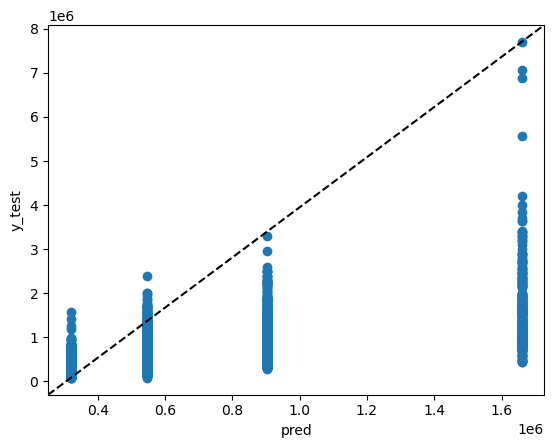

In [22]:
pred = regr2.predict(X_test)

plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

This model is peforming better than the multivarite regression model that had the same amount of features.

Now lets use bagging and random forests to see if we can improve the model

20429730579.325695

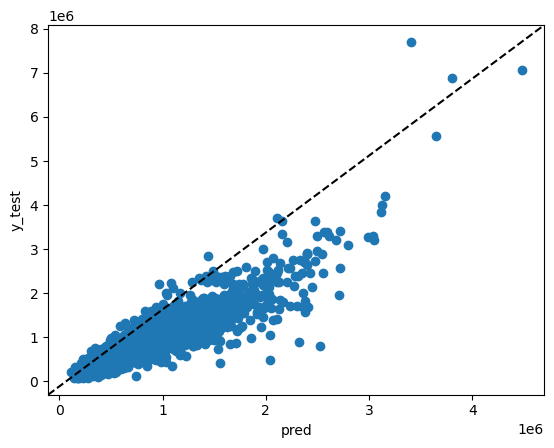

In [24]:
# Now using random forests with 10 features

regr1 = RandomForestRegressor(max_features=10, random_state=1)
regr1.fit(X_train, y_train)

pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

This model has had our best MSE score value so far, perhaps trying this model with different amount of features can further optimize the model 

22250296805.049755

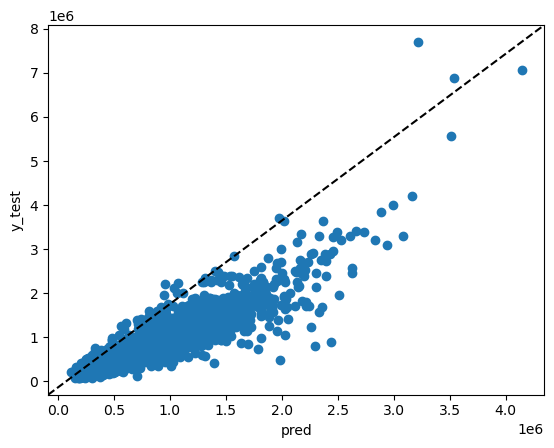

In [25]:
#Now with 5 features 
regr1 = RandomForestRegressor(max_features=5, random_state=1)
regr1.fit(X_train, y_train)

pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

This model performs a little worse than the model with 10 features however it is still signficantly better than the multivaritate models

20807007356.78605

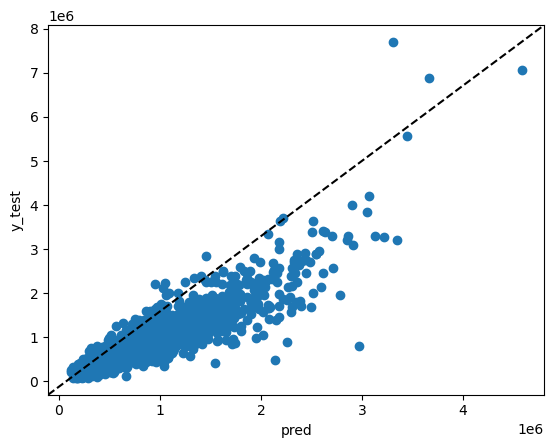

In [26]:
#Now with 15 features 
regr1 = RandomForestRegressor(max_features=15, random_state=1)
regr1.fit(X_train, y_train)

pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

This model performs better than the model with 5 fetaures however it is still slightly worse than our model with 10 features. Maybe theres a model that has features that ranges from 10-15 that is our best 

20768874990.707638

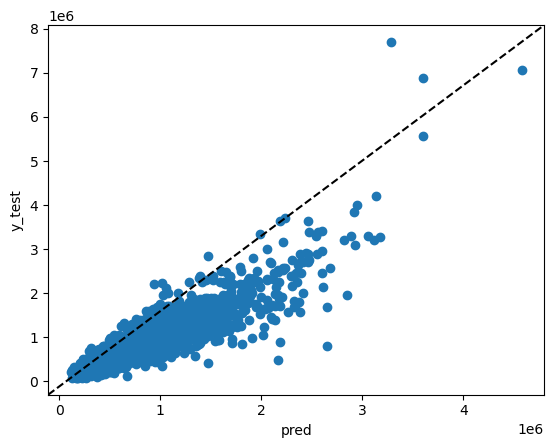

In [27]:
#Now with 13 features 

regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

This is still worse than our model with 10 features perhaps reducing the features will decrease the MSE score 

20356207418.16121

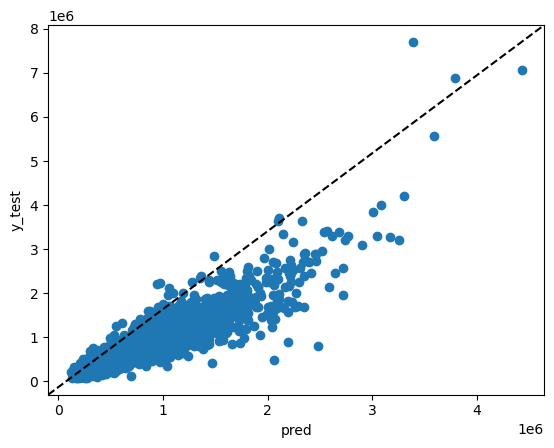

In [28]:
#Now with 11 features 

regr1 = RandomForestRegressor(max_features=11, random_state=1)
regr1.fit(X_train, y_train)

pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

Reducing our features to 11 found our best random forest model with a slightly lower MSE score than the forest with 10 features.

In our our multivarite model we came to the conclusion that sqftliving,sqftabove and sqftlot were the most important features lets see if that holds true with our random forest model as well

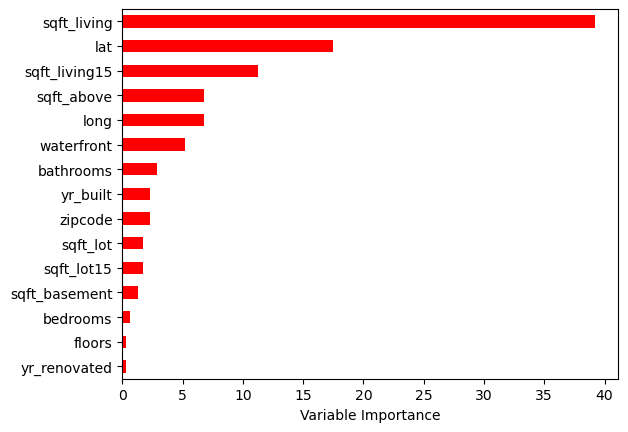

In [31]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

According to our random forest the most important feature was sqft living by a large margin, which is not a suprise. However latitude is the second most important variable which is very interesting as in our multivarite model when looked to determine the most important features latitude was not high on that list.

Another intresting find is how low sqft lot's importance is. It is by far the lowest ranking out of all the sqft related features. 

From this model it seems to indicate that bathrooms have a bigger impact on price than bedrooms which is not something I expected. 



In conclusion the best machine learning algorithm to use for predciting home prices are random forests. 

Multivariate regression models are also suitable however you have to figure out what variables are important and than experiminting with different combniations of those variables to find the best model.

Linear regression models should not be used because house prices are effected by many variables so using just one will lead to models are very inaccruate. 
